In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm
import math

In [2]:
data = pd.read_csv('SolCastData.csv', header=0, index_col=0,
parse_dates=True)

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.head()

,AirTemp,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m
PeriodStart,,,,,,,,,,,,,,,
2006-12-31 00:00:00+00:00,-2.2,13.5,-3.2,0,0,0,0,0,0,7.3,93.5,0.0,1038.3,78,1.2
2006-12-31 01:00:00+00:00,-2.6,15.0,-3.4,0,0,0,0,0,0,7.4,93.5,0.0,1038.4,72,1.2
2006-12-31 02:00:00+00:00,-2.9,16.5,-3.9,0,0,0,0,0,0,7.4,92.8,0.0,1038.4,71,1.2
2006-12-31 03:00:00+00:00,-2.9,18.0,-4.2,0,0,0,0,0,0,7.4,91.1,0.0,1038.3,73,1.4
2006-12-31 04:00:00+00:00,-2.6,20.0,-4.0,0,0,0,0,0,0,7.3,90.4,0.0,1038.4,76,1.6


In [5]:
data.dtypes

AirTemp              float64
CloudOpacity         float64
DewpointTemp         float64
Dhi                    int64
Dni                    int64
Ebh                    int64
Ghi                    int64
GtiFixedTilt           int64
GtiTracking            int64
PrecipitableWater    float64
RelativeHumidity     float64
SnowWater            float64
SurfacePressure      float64
WindDirection10m       int64
WindSpeed10m         float64
dtype: object

In [6]:
data.size

2148120

In [7]:
data.describe()

,AirTemp,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m
count,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000,143208.000000
mean,14.661279,20.549219,9.022176,61.722083,199.456637,117.713082,179.437545,205.150816,229.438069,20.856401,71.245893,0.154928,1017.866871,147.845407,1.844759
std,7.874304,28.515319,6.877849,88.028160,315.043089,215.412917,265.832079,308.631742,329.319445,8.796266,16.126360,0.686862,6.249385,98.329626,0.960279
min,-9.200000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,16.700000,0.000000,985.400000,0.000000,0.000000
25%,8.900000,0.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.200000,59.400000,0.000000,1014.500000,74.000000,1.100000
50%,14.400000,0.800000,9.400000,7.000000,0.000000,0.000000,8.000000,7.000000,7.000000,20.100000,74.100000,0.000000,1017.800000,104.000000,1.700000
75%,20.300000,41.000000,14.700000,103.000000,387.000000,137.000000,305.000000,332.000000,454.000000,27.400000,84.700000,0.000000,1021.500000,239.000000,2.400000
max,37.900000,97.000000,24.800000,573.000000,998.000000,900.000000,992.000000,1101.000000,1015.000000,57.600000,99.700000,22.200000,1041.000000,360.000000,8.300000


In [8]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [9]:
from pmdarima import model_selection
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [10]:
data.columns

Index(['AirTemp', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi',
       'GtiFixedTilt', 'GtiTracking', 'PrecipitableWater', 'RelativeHumidity',
       'SnowWater', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m'],
      dtype='object')

In [11]:
train=data[['AirTemp', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi',
       'GtiFixedTilt', 'GtiTracking', 'PrecipitableWater', 'RelativeHumidity',
       'SnowWater', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m']][43850 : 140280]

test=data[['AirTemp', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi',
       'GtiFixedTilt', 'GtiTracking', 'PrecipitableWater', 'RelativeHumidity',
       'SnowWater', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m']][140280:]

In [12]:
train.shape

(96430, 15)

In [13]:
test.shape

(2928, 15)

In [14]:
train.head

<bound method NDFrame.head of                            AirTemp  CloudOpacity  DewpointTemp  Dhi  Dni  Ebh  \
PeriodStart                                                                     
2012-01-01 02:00:00+00:00     -0.8           0.0          -4.6    0    0    0   
2012-01-01 03:00:00+00:00     -1.4           0.0          -4.9    0    0    0   
2012-01-01 04:00:00+00:00     -1.6           0.0          -5.2    0    0    0   
2012-01-01 05:00:00+00:00     -1.9           0.0          -5.6    0    0    0   
2012-01-01 06:00:00+00:00     -1.6           0.0          -5.4   14  253   25   
...                            ...           ...           ...  ...  ...  ...   
2022-12-31 19:00:00+00:00      7.2           0.0           6.5    0    0    0   
2022-12-31 20:00:00+00:00      6.8           0.0           5.9    0    0    0   
2022-12-31 21:00:00+00:00      6.3           0.0           5.3    0    0    0   
2022-12-31 22:00:00+00:00      6.0           0.0           4.9    0    0    0  

In [15]:
train.isna().sum()

AirTemp              0
CloudOpacity         0
DewpointTemp         0
Dhi                  0
Dni                  0
Ebh                  0
Ghi                  0
GtiFixedTilt         0
GtiTracking          0
PrecipitableWater    0
RelativeHumidity     0
SnowWater            0
SurfacePressure      0
WindDirection10m     0
WindSpeed10m         0
dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96430 entries, 2012-01-01 02:00:00+00:00 to 2022-12-31 23:00:00+00:00
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AirTemp            96430 non-null  float64
 1   CloudOpacity       96430 non-null  float64
 2   DewpointTemp       96430 non-null  float64
 3   Dhi                96430 non-null  int64  
 4   Dni                96430 non-null  int64  
 5   Ebh                96430 non-null  int64  
 6   Ghi                96430 non-null  int64  
 7   GtiFixedTilt       96430 non-null  int64  
 8   GtiTracking        96430 non-null  int64  
 9   PrecipitableWater  96430 non-null  float64
 10  RelativeHumidity   96430 non-null  float64
 11  SnowWater          96430 non-null  float64
 12  SurfacePressure    96430 non-null  float64
 13  WindDirection10m   96430 non-null  int64  
 14  WindSpeed10m       96430 non-null  float64
dtypes: float64(8), int64(7)

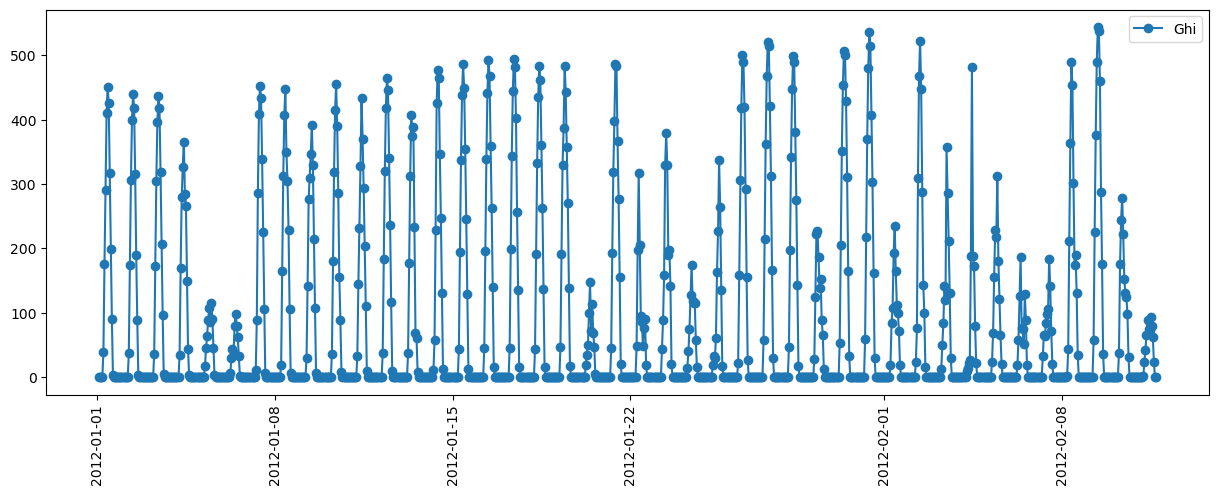

In [17]:
plt.figure(figsize=(15,5))
#plt.grid()
plt.plot(train['Ghi'][:1000], marker='o', label='Ghi')
plt.xticks(rotation=90)
plt.legend()
plt.show()

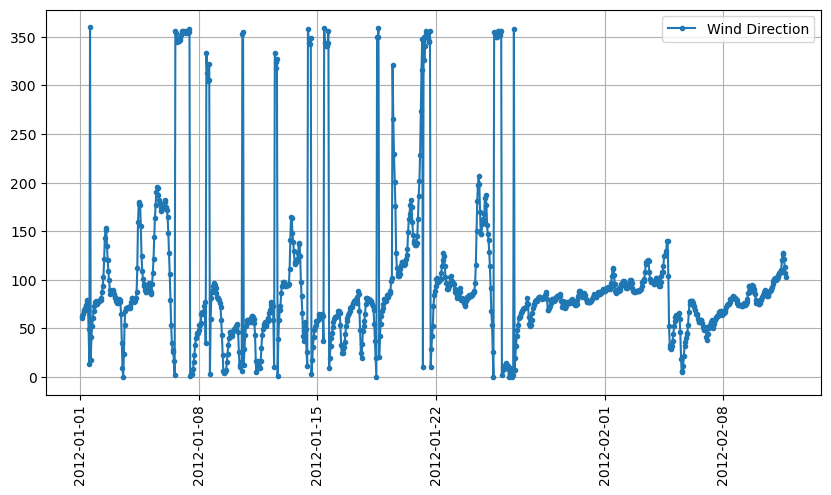

In [18]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(train['WindDirection10m'][:1000], marker='.', label='Wind Direction')
plt.xticks(rotation=90)
plt.legend()
plt.show()

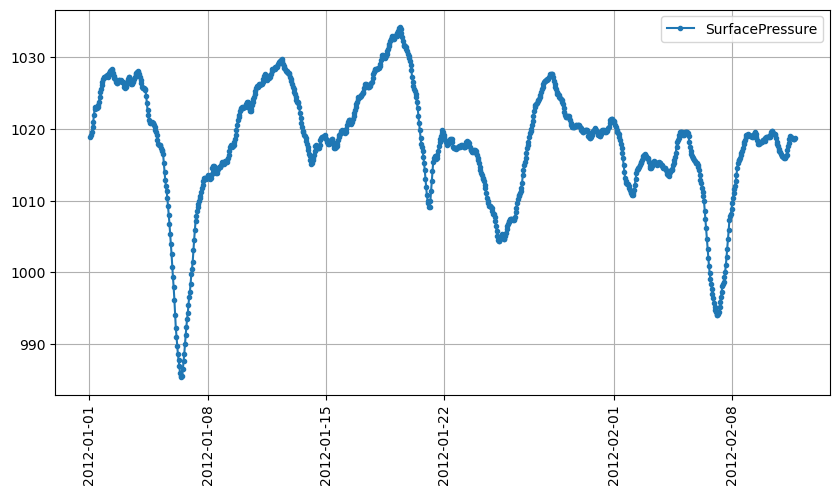

In [19]:
#plotting the first 1000 observations to detect temperature trend
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(train['SurfacePressure'][:1000], marker='.', label='SurfacePressure')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [20]:
#Seasonal Decomposition
ts_decomposition = seasonal_decompose(x=train['AirTemp'], model='additive', period=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

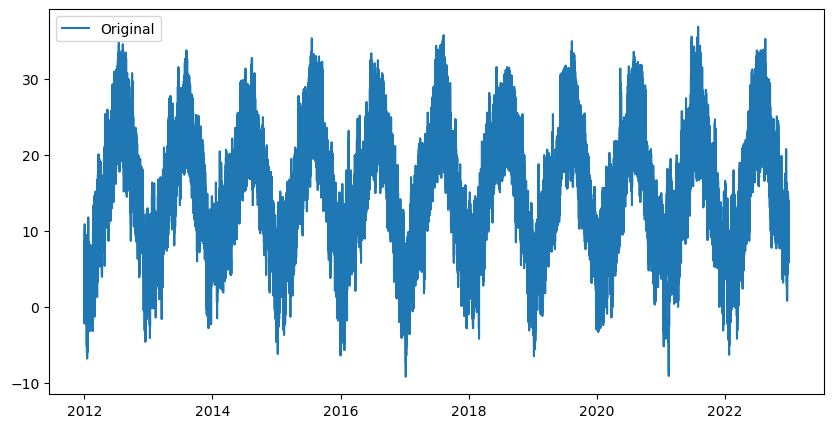

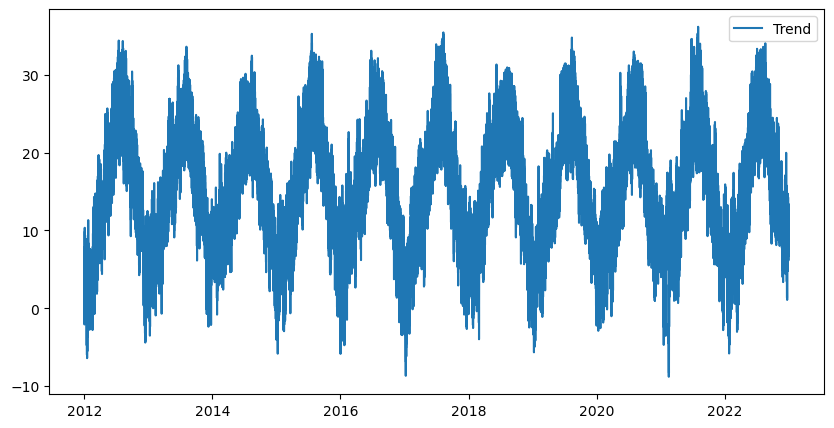

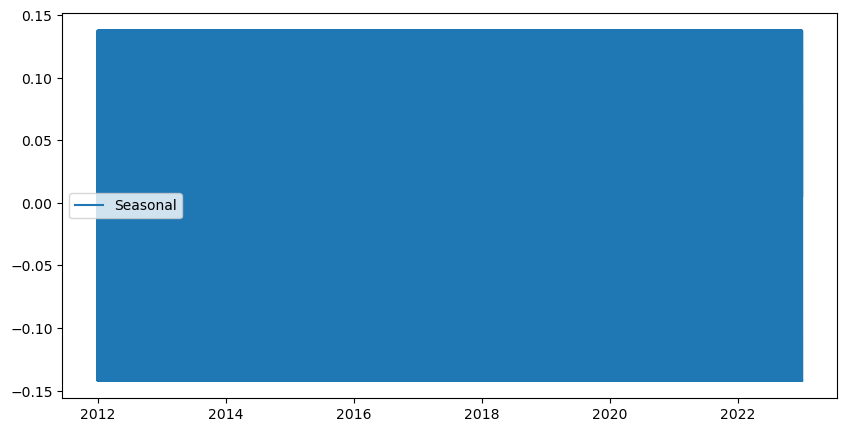

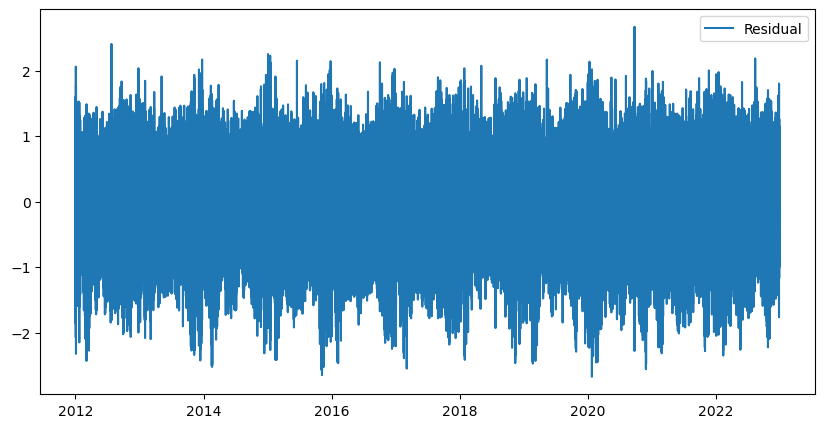

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train['AirTemp'], label='Original')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(10,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

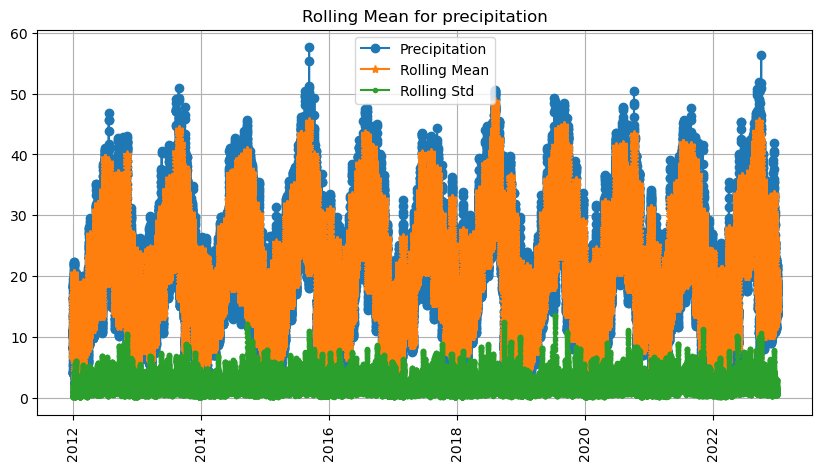

In [22]:
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(train['PrecipitableWater'], marker='o', label='Precipitation')
plt.plot(train['PrecipitableWater'].rolling(window=25).mean(), marker='*', label='Rolling Mean')
plt.plot(train['PrecipitableWater'].rolling(window=25).std(), marker='.', label='Rolling Std')
plt.xticks(rotation=90)
plt.title("Rolling Mean for precipitation")
plt.legend()
plt.show()

In [23]:
#Stationarity Check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, signif=0.05, name='', verbose=False):
    

    result = adfuller(data.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [24]:
#adf test on each column
for name, column in train.items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AirTemp" 
    -----------------------------------------------
ADF Statistic: -6.641422
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "CloudOpacity" 
    -----------------------------------------------
ADF Statistic: -24.080992
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "DewpointTemp" 
    -----------------------------------------------
ADF Statistic: -9.473879
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Dhi" 
    -----------------------------------------------
ADF Statistic: -19.161373
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Dni" 
    -----------------------------------------------
ADF Statistic: -22.765118
p-value: 0.000000
Critical Values:


In [25]:
for name, column in test.diff().dropna().items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AirTemp" 
    -----------------------------------------------
ADF Statistic: -11.969193
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "CloudOpacity" 
    -----------------------------------------------
ADF Statistic: -13.032439
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "DewpointTemp" 
    -----------------------------------------------
ADF Statistic: -9.860016
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Dhi" 
    -----------------------------------------------
ADF Statistic: -23.658755
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


    Augmented Dickey-Fuller Test on "Dni" 
    -----------------------------------------------
ADF Statistic: -15.737487
p-value: 0.000000
Critical Values:

C:\Users\Kejdi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


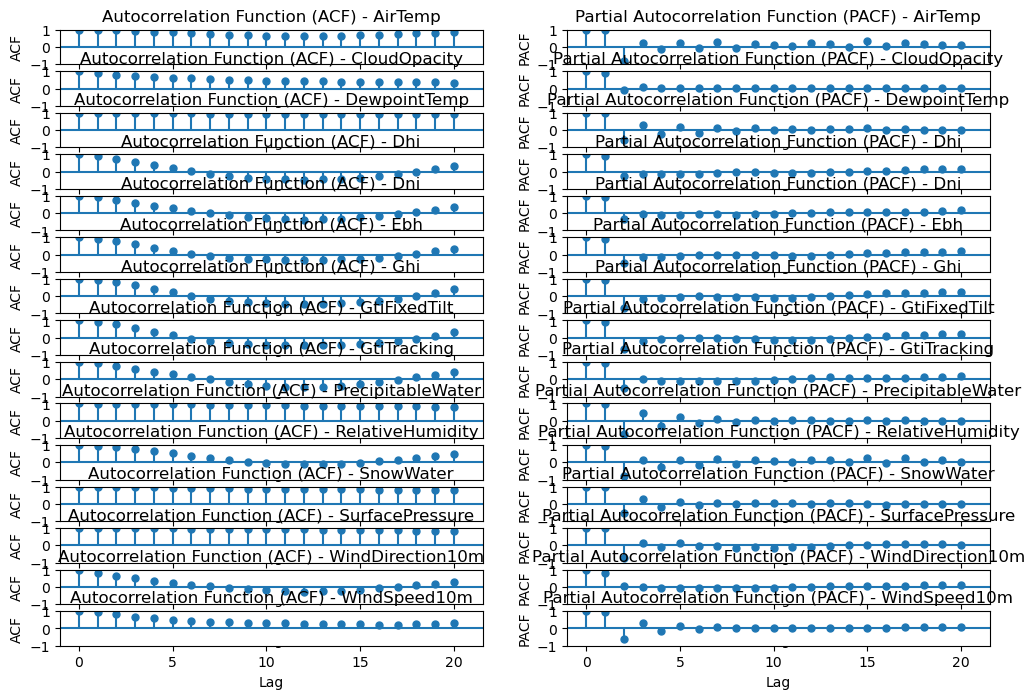

In [26]:
# Iterate over each variable and plot ACF and PACF
num_variables = len(data.columns)
fig, axes = plt.subplots(num_variables, 2, figsize=(12, 8))
for i, variable in enumerate(data.columns):
    # ACF plot
    ax1 = axes[i, 0]
    plot_acf(data[variable], ax=ax1, lags=20)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('ACF')
    ax1.set_title(f'Autocorrelation Function (ACF) - {variable}')
    
    # PACF plot
    ax2 = axes[i, 1]
    plot_pacf(data[variable], ax=ax2, lags=20)
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('PACF')
    ax2.set_title(f'Partial Autocorrelation Function (PACF) - {variable}')

#plt.tight_layout()
plt.show()

In [27]:
import statsmodels.api as sm
time_series = data['AirTemp']

# Calculate ACF values
acf_values, confint = sm.tsa.acf(time_series, nlags=10000, alpha=0.05)

# Print ACF values
for lag, acf in enumerate(acf_values):
    print(f"Lag {lag}: {acf}")

Lag 0: 1.0
Lag 1: 0.9912195702899422
Lag 2: 0.9680043429303233
Lag 3: 0.9344657828871993
Lag 4: 0.8937067347356519
Lag 5: 0.8491061236347195
Lag 6: 0.8034062987753053
Lag 7: 0.7596703743310819
Lag 8: 0.7204941159069634
Lag 9: 0.6875979760536367
Lag 10: 0.6628016505522952
Lag 11: 0.6469773916221505
Lag 12: 0.6407161726999556
Lag 13: 0.6447147405316349
Lag 14: 0.6581566967754917
Lag 15: 0.6803375499907507
Lag 16: 0.7103175638919733
Lag 17: 0.7462425519479406
Lag 18: 0.78636330323045
Lag 19: 0.828101037938083
Lag 20: 0.8684812044190073
Lag 21: 0.9048923237071751
Lag 22: 0.9341149354365257
Lag 23: 0.953297356130071
Lag 24: 0.9593842318936294
Lag 25: 0.9502879262773575
Lag 26: 0.9282362584885273
Lag 27: 0.8963862053962849
Lag 28: 0.8576368509192794
Lag 29: 0.8152175396622454
Lag 30: 0.7717279852521561
Lag 31: 0.7300863969929076
Lag 32: 0.6927718621399349
Lag 33: 0.6614178423744432
Lag 34: 0.6377619204266176
Lag 35: 0.6226466803629076
Lag 36: 0.616651463717385
Lag 37: 0.6204593374848119
Lag 

In [28]:
time_series = data['AirTemp']

# Calculate PACF values
pacf_values = sm.tsa.pacf(time_series, nlags=100)

# Print PACF values
for lag, pacf in enumerate(pacf_values):
    print(f"Lag {lag}: {pacf}")

Lag 0: 1.0
Lag 1: 0.9912264918759697
Lag 2: -0.830684687681999
Lag 3: 0.23903597548856284
Lag 4: -0.09701438392901984
Lag 5: 0.21943902535683757
Lag 6: -0.05659534248701033
Lag 7: 0.29945841176916466
Lag 8: -0.040718722056767825
Lag 9: 0.17017065790930103
Lag 10: 0.13586556846760436
Lag 11: 0.0472515174276503
Lag 12: 0.2202616610507376
Lag 13: 0.17409272517163774
Lag 14: 0.002861745866222396
Lag 15: 0.3209562046282882
Lag 16: 0.07281778195137266
Lag 17: 0.22250792470614314
Lag 18: 0.16307578312484142
Lag 19: 0.13855076043475012
Lag 20: 0.0916179457783867
Lag 21: 0.13974435746685124
Lag 22: -0.08746539679598195
Lag 23: -0.05914067583686198
Lag 24: -0.48199289580735355
Lag 25: -0.17793552212985747
Lag 26: 0.25797917463512826
Lag 27: -0.08813765915491188
Lag 28: 0.12673743433646315
Lag 29: -0.056926844077473095
Lag 30: 0.030921752268505884
Lag 31: -0.023759257265596415
Lag 32: -0.016878803478601677
Lag 33: -0.016597121216951966
Lag 34: -0.02062123644591355
Lag 35: -0.02053127163984281
Lag

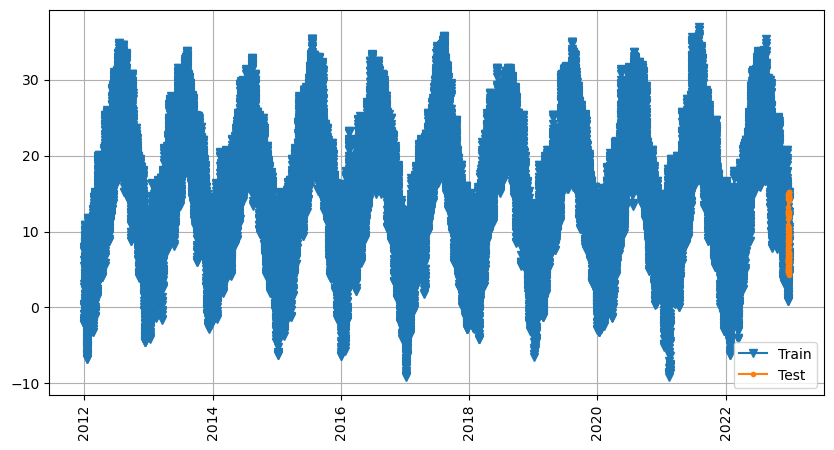

In [29]:
#train_test_split
train=train[:-100]
test=train[-100:]

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(train['AirTemp'], marker='v', label='Train')
plt.plot( test['AirTemp'], marker='.', label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()

C:\Users\Kejdi\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-37273.673, Time=155.56 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=411059.823, Time=181.87 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-39887.978, Time=95.17 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-41052.342, Time=100.28 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=-40810.678, Time=57.59 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=-41147.765, Time=162.77 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=-41049.709, Time=69.51 sec
 ARIMA(0,2,1)(2,0,1)[4]             : AIC=-41171.777, Time=125.59 sec
 ARIMA(0,2,1)(2,0,0)[4]             : AIC=-41200.372, Time=92.46 sec
 ARIMA(0,2,0)(2,0,0)[4]             : AIC=-37666.379, Time=119.54 sec
 ARIMA(1,2,1)(2,0,0)[4]             : AIC=-45750.180, Time=92.06 sec
 ARIMA(1,2,1)(1,0,0)[4]             : AIC=-45562.277, Time=71.51 sec
 ARIMA(1,2,1)(2,0,1)[4]             : AIC=-45753.176, Time=96.75 sec
 ARIMA(1,2,1)(1,0,1)[4]             : AIC=-45697.422, 

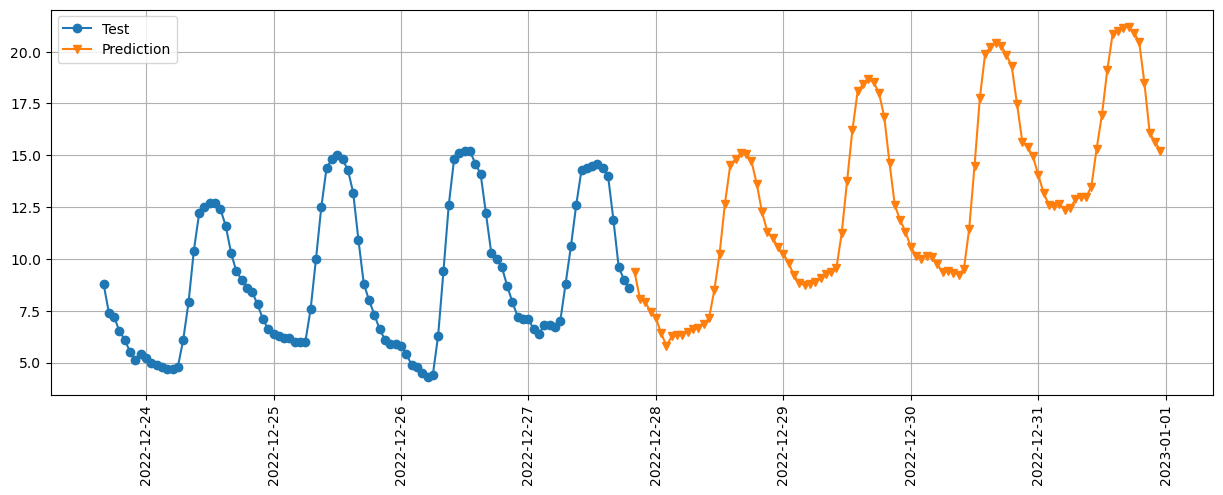

Mean Absolute Percentage Error 0.47172956757529677
Mean Squared Error 18.525631021183155
RMSE 4.304141147915941
AIC values -45753.176390977016


In [30]:
#model fitting
#arima model fit
# Model Evaluation 

# Fit a simple auto_arima model
#The ideal number of the iterations is maxiter=500
arima = pm.auto_arima(train['AirTemp'],X=train.drop(columns=['AirTemp']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,m=4,stationary=False,test='adf', n_jobs=-1)

# Print out summary information on the fit
print(arima.summary())
print(arima.params)



pred=arima.predict(n_periods=100,X=test.drop(columns=['AirTemp']), alpha=0.05)
pred

plt.figure(figsize=(15,5))
plt.grid()

plt.plot(test['AirTemp'], marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_percentage_error(test['AirTemp'], pred)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['AirTemp'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)



In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['AirTemp'], pred)
mae

3.901675301658182

In [32]:
a=pd.DataFrame(test['AirTemp'])
a

prediction=pd.DataFrame(pred)
prediction




,0
2022-12-27 20:00:00+00:00,9.359329
2022-12-27 21:00:00+00:00,8.081224
2022-12-27 22:00:00+00:00,7.918436
2022-12-27 23:00:00+00:00,7.446819
2022-12-28 00:00:00+00:00,7.161980
...,...
2022-12-31 19:00:00+00:00,20.483262
2022-12-31 20:00:00+00:00,18.470095
2022-12-31 21:00:00+00:00,16.066444
2022-12-31 22:00:00+00:00,15.650492


In [33]:
#Evaluation of the model with another auto_arima function

#model = pm.auto_arima(data['AirTemp'], 
 #                       m=12, seasonal=True,
  #                    start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
   #                        suppress_warnings=True,
    #                  stepwise=True, trace=True)



In [34]:
#model.fit(train['AirTemp'])

In [35]:
#forecast=model.predict(n_periods=10, return_conf_int=True)
#forecast

In [36]:
#forecast_data = pd.DataFrame(forecast[0], columns=['Prediction'])
#forecast_data

In [37]:
#plotting the prediction period
#pd.concat([train['AirTemp'],forecast_data],axis=1).plot()

In [38]:
#Predict the unseen future time series values
#forecast1=model.predict(n_periods=50, return_conf_int=True)
#forecast_range=pd.date_range(start='2017-05-31', periods=100,freq='H')


In [43]:
import pickle
with open('arima.pkl', 'wb') as f:
    pickle.dump(arima, f)

In [45]:
with open('arima.pkl', 'rb') as f:
    arima = pickle.load(f)
    

In [47]:
with open('arima.pkl', 'rb') as pkl:
    pickle_predictions = pickle.load(pkl).predict(n_periods=100,X=test.drop(columns=['AirTemp']), alpha=0.05)